In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "Dataset 3/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
									  zoom_range=0.15,
									  horizontal_flip=True,
									  fill_mode='nearest')

VALIDATION_DIR = "Dataset 3/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

87916544/87910968 [==============================] - 13s 0us/step


In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 97s 7s/step - loss: 10.0931 - acc: 0.7321 - val_loss: 0.7648 - val_acc: 0.5816
Epoch 2/20
14/14 [==============================] - 76s 5s/step - loss: 0.2135 - acc: 0.9127 - val_loss: 0.1990 - val_acc: 0.9133
Epoch 3/20
14/14 [==============================] - 86s 6s/step - loss: 0.0974 - acc: 0.9593 - val_loss: 0.1786 - val_acc: 0.9439
Epoch 4/20
14/14 [==============================] - 92s 7s/step - loss: 0.1417 - acc: 0.9545 - val_loss: 0.1009 - val_acc: 0.9592
Epoch 5/20
14/14 [==============================] - 87s 6s/step - loss: 0.2502 - acc: 0.9151 - val_loss: 0.1029 - val_acc: 0.9592
Epoch 6/20
14/14 [==============================] - ETA: 0s - loss: 0.0689 - acc: 0.9737

 Reached The Destination!
14/14 [==============================] - 78s 6s/step - loss: 0.0689 - acc: 0.9737 - val_loss: 0.0943 - val_acc: 0.9643


In [4]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 109s 8s/step - loss: 0.3950 - acc: 0.7733 - val_loss: 0.1006 - val_acc: 0.9592
Epoch 2/10
14/14 [==============================] - 104s 7s/step - loss: 0.3500 - acc: 0.8086 - val_loss: 0.1069 - val_acc: 0.9643
Epoch 3/10
14/14 [==============================] - 104s 7s/step - loss: 0.2914 - acc: 0.8481 - val_loss: 0.1165 - val_acc: 0.9541
Epoch 4/10
14/14 [==============================] - 108s 8s/step - loss: 0.2625 - acc: 0.8756 - val_loss: 0.1180 - val_acc: 0.9592
Epoch 5/10
14/14 [==============================] - 121s 9s/step - loss: 0.2246 - acc: 0.9067 - val_loss: 0.1316 - val_acc: 0.9541
Epoch 6/10
14/14 [==============================] - 104s 7s/step - loss: 0.1991 - acc: 0.9288 - val_loss: 0.1353 - val_acc: 0.9592
Epoch 7/10
14/14 [==============================] - 102s 7s/step - loss: 0.1821 - acc: 0.9432 - val_loss: 0.1431 - val_acc: 0.9541
Epoch 8/10
14/14 [==============================] - 102s 7s/step - loss: 0.1783 - a

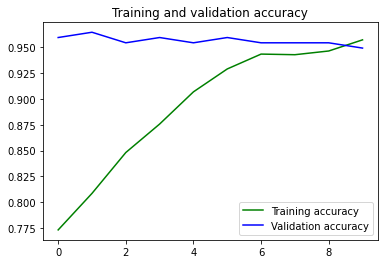

<Figure size 432x288 with 0 Axes>

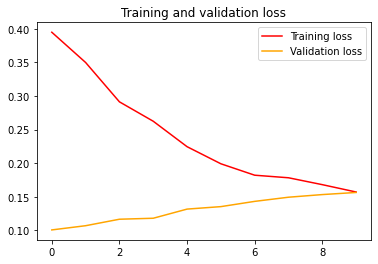

<Figure size 432x288 with 0 Axes>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [13]:
model.save('Model')

Exception ignored in: <function ScopedTFGraph.__del__ at 0x00000205B49890D0>
Traceback (most recent call last):
  File "C:\Users\chara\anaconda3\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 54, in __del__
    self.deleter(self.graph)
AttributeError: 'ScopedTFGraph' object has no attribute 'deleter'


INFO:tensorflow:Assets written to: Model\assets
